# Filter image for CNN

In this notebook, we visualize convolutional filtering on the MNIST digit data. Later on, we apply CNN to classififaction problem on MNIST data. 

In [358]:
from sklearn.datasets import fetch_openml
import numpy as np
import matplotlib.pyplot as plt


mnist = fetch_openml('mnist_784', version=1)
mnist.target = mnist.target.astype(np.uint8)
X = mnist["data"]
y = mnist["target"]
X = X / 255

In [359]:
X.shape[0]

70000

In [360]:
def filter_func(data, filter_mat):
    data = np.reshape(data, (28,28))
    row = data.shape[0] - filter_mat.shape[0] + 1
    col = data.shape[1] - filter_mat.shape[1] + 1
    mat = np.zeros((row,col), dtype=int)
    l = filter_mat.shape[0]
    for r in range(row):
        for c in range(col):
            tmp = data[r:r+l,c:c+l]
            mat[r,c] = np.sum(np.multiply(tmp,filter_mat))
    return mat     

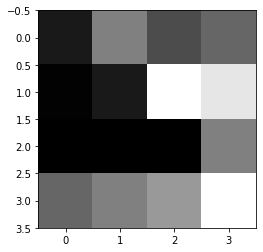

In [386]:
#filtered_mat = np.array([[1, 5 , 3],[0.1,1,10],[0, 0,0]])
filtered_mat = np.array([[1, 5 , 3, 4],[0.1,1,10, 9],[0, 0,0, 5], [4, 5 , 6, 10]])
#filtered_mat = np.array([[1, 5 , 3, 4 , 5],[0.1,1,10, 9, 10],[0, 0,0, 5, 0], [4, 5 , 6, 10, 6], [20, 2 , 5, 7, 32]])
plt.imshow(filtered_mat, cmap="gray")

## Plotting some random original images from MNIST digit dataset

In [387]:
def plot_img(img_data, indx, size=28, row=10, col=10):
    fig, axs = plt.subplots(row, col)
    fig.set_figheight(11)
    fig.set_figwidth(11)
    i = 0
    for r in range(row):
        for c in range(col):
            X_reshape = np.reshape(img_data[indx[i]], (size, size))
            axs[r, c].imshow(X_reshape)
            i+= 1

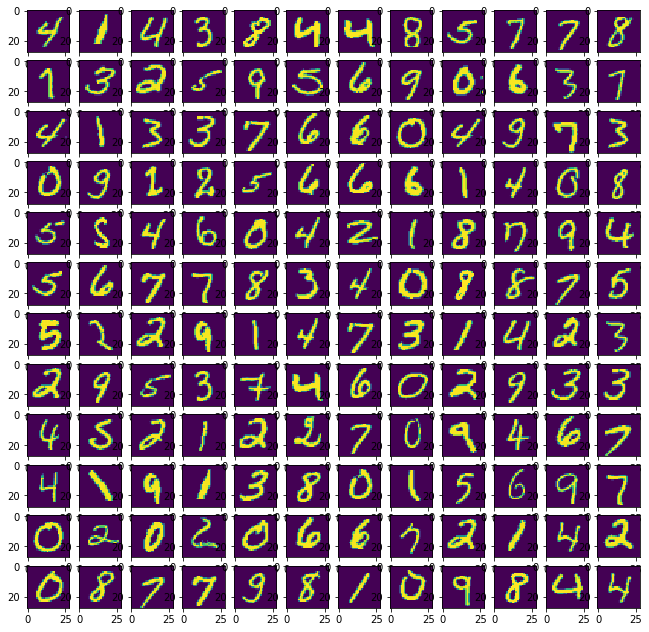

In [388]:
indx = np.random.randint(501, size = 500)
plot_img(X, indx, size = 28, row = 12, col = 12)

## Applying filtering on the images then plotting them again

In [389]:
for i in range(len(indx)):
    X_filtered = filter_func(X[i,:], filtered_mat)
    X_filtered = np.reshape(X_filtered, (X_filtered.shape[0]*X_filtered.shape[1],1))
    if i == 0:
        Mat = X_filtered
    else:
        Mat = np.concatenate((Mat, X_filtered), axis=1)

In [390]:
Mat.shape[0]

625

In [391]:
def find_size(Mat):
    i = 1
    done = False 
    while not done:
        i += 1
        j = i*i
        #print("j =",j, "i =", i)
        if j == Mat.shape[0]:
            done = True
        
    return i

In [392]:
print(find_size(Mat))

25


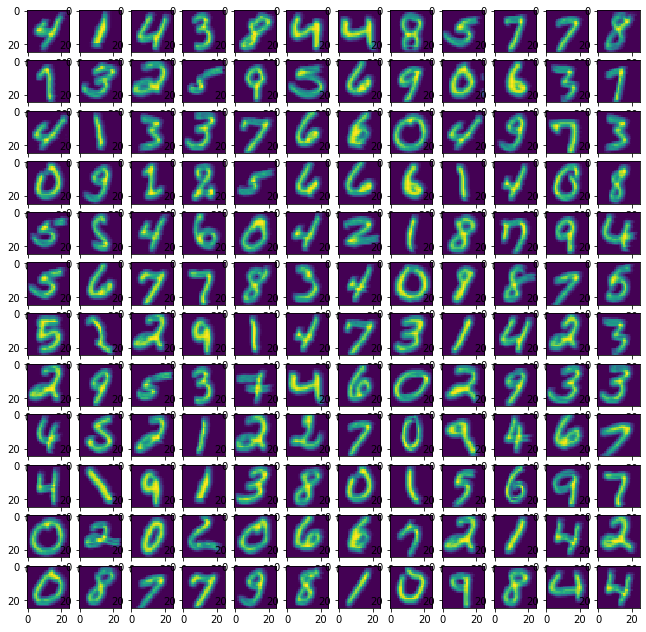

In [393]:
s = find_size(Mat)
plot_img(Mat.T, indx, size = s, row = 12, col = 12)

# Apply TensorFlow CNN on the MNIST dataset 

## Filter using TensorFlow 

In [134]:
from sklearn.datasets import load_sample_image
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt


china = load_sample_image("china.jpg") / 255
flower = load_sample_image("flower.jpg") / 255

images = np.array([china, flower])
batch_size, height, width, channels = images.shape 

In [135]:
filters = np.zeros(shape=(7,7, channels, 2), dtype=np.float32) 
filters[:,3,:, 0] = 1
filters[3,:, :,1] = 1

In [138]:
outputs = tf.nn.conv2d(images, filters, strides= 1, padding="SAME")

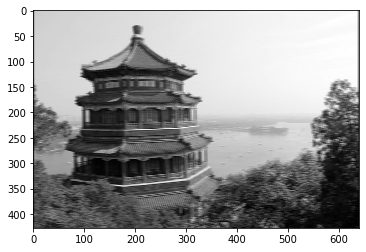

In [144]:
plt.imshow(outputs[0,:,:,1], cmap="gray")

In [310]:
import tensorflow as tf
from tensorflow import keras 
import matplotlib.pyplot as plt
import pandas as pd

In [311]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [323]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:]/255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
X_valid = X_valid.reshape((X_valid.shape[0], 28, 28, 1))

In [331]:
model = keras.models.Sequential([
    keras.layers.Conv2D(64, 7, activation='relu', padding="same", input_shape=[28,28,1]),
    keras.layers.MaxPooling2D(2),
    keras.layers.Conv2D(128,3, activation="relu", padding="same"),
    #keras.layers.Conv2D(128,3, activation="relu", padding="same"),
    keras.layers.MaxPooling2D(2),
    keras.layers.Conv2D(256,3, activation="relu", padding="same"),
    #keras.layers.Conv2D(256,3, activation="relu", padding="same"),
    keras.layers.MaxPooling2D(2),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(64, activation="relu"),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation="softmax")
])

In [332]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_39 (Conv2D)           (None, 28, 28, 64)        3200      
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_40 (Conv2D)           (None, 14, 14, 128)       73856     
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 7, 7, 128)         0         
_________________________________________________________________
conv2d_41 (Conv2D)           (None, 7, 7, 256)         295168    
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 3, 3, 256)         0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 2304)             

In [336]:
model.compile(loss = "sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

In [337]:
history = model.fit(X_train, y_train, epochs = 10, validation_data = (X_valid, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 105s 2ms/sample - loss: 0.0962 - accuracy: 0.9671 - val_loss: 0.4077 - val_accuracy: 0.9204
Epoch 2/10
55000/55000 [==============================] - 105s 2ms/sample - loss: 0.0784 - accuracy: 0.9729 - val_loss: 0.4255 - val_accuracy: 0.9164
Epoch 3/10
55000/55000 [==============================] - 107s 2ms/sample - loss: 0.0690 - accuracy: 0.9754 - val_loss: 0.4311 - val_accuracy: 0.9226
Epoch 4/10
55000/55000 [==============================] - 109s 2ms/sample - loss: 0.0668 - accuracy: 0.9769 - val_loss: 0.4476 - val_accuracy: 0.9200
Epoch 5/10
55000/55000 [==============================] - 111s 2ms/sample - loss: 0.0629 - accuracy: 0.9782 - val_loss: 0.4613 - val_accuracy: 0.9210
Epoch 6/10
55000/55000 [==============================] - 111s 2ms/sample - loss: 0.0583 - accuracy: 0.9796 - val_loss: 0.4621 - val_accuracy: 0.9220
Epoch 7/10
55000/55000 [===========================

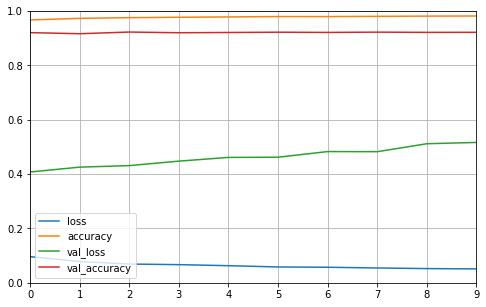

In [339]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

## Apply ResNet

In [347]:
class ResidualUnit(keras.layers.Layer):
    def __init__(self, filters, strides = 1, activation = 'relu', **kwargs):
        super().__init__(**kwargs)
        self.activation = keras.activations.get(activation)
        self.main_layers = [
            keras.layers.Conv2D(filters, 3, strides=strides, padding="same", use_bias=False),
            keras.layers.BatchNormalization(),
            self.activation,
            keras.layers.Conv2D(filters, 3, strides = 1, padding="same", use_bias=False),
            keras.layers.BatchNormalization()]
        self.skip_layers = []
        if strides > 1:
            self.skip_layers = [
                keras.layers.Conv2D(filters, 1, strides=strides, padding="same", use_bias=False),
                keras.layers.BatchNormalization()]
            
    def call(self, inputs):
        Z = inputs
        for layer in self.main_layers:
            Z = layer(Z)
        skip_Z = inputs 
        for layer in self.skip_layers:
            skip_Z = layer(skip_Z)
        return self.activation(Z+skip_Z)
    

In [ ]:
modelResNet = keras.models.Sequential()
modelResNet.add(keras.layers.Conv2D(64, 7, strides=2, input_shape=[28,28,1], padding="same", use_bias=False))
modelResNet.add(keras.layers.BatchNormalization())
modelResNet.add(keras.layers.Activation("relu"))
modelResNet.add(keras.layers.MaxPool2D(pool_size=3, strides = 2, padding="same"))
prev_filters = 64
for filters in [64] * 3 + [128] * 4 + [256] * 6 + [512] * 3:
    strides = 1 if filters == prev_filters else 2
    modelResNet.add(ResidualUnit(filters, strides=strides))
modelResNetprev_filters = filters
modelResNet.add(keras.layers.GlobalAvgPool2D())
modelResNet.add(keras.layers.Flatten())
modelResNet.add(keras.layers.Dense(10, activation="softmax"))

In [355]:
modelResNet.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_208 (Conv2D)          (None, 14, 14, 64)        3136      
_________________________________________________________________
batch_normalization_165 (Bat (None, 14, 14, 64)        256       
_________________________________________________________________
activation_5 (Activation)    (None, 14, 14, 64)        0         
_________________________________________________________________
max_pooling2d_29 (MaxPooling (None, 7, 7, 64)          0         
_________________________________________________________________
residual_unit_64 (ResidualUn (None, 7, 7, 64)          74240     
_________________________________________________________________
residual_unit_65 (ResidualUn (None, 7, 7, 64)          74240     
_________________________________________________________________
residual_unit_66 (ResidualUn (None, 7, 7, 64)        

In [356]:
modelResNet.compile(loss = "sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

In [ ]:
history = modelResNet.fit(X_train, y_train, epochs = 10, validation_data = (X_valid, y_valid))